# Handwritten digits classification using CNN

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train.shape

(60000,)

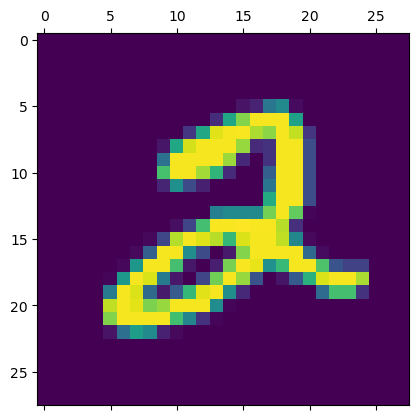

In [7]:
plt.matshow(X_train[5])
plt.show()

In [8]:
y_train[5]

2

In [9]:
y_train.shape

(60000,)

In [12]:
#Reshape the data
#CNNs generally expect input data in the form of 4D tensors with the shape (batch_size, height, width, channels).

X_train = X_train.reshape((X_train.shape[0],28,28, 1))
X_test = X_test.reshape((X_test.shape[0], 28,28, 1))

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
#Lets normalize the data

X_train = X_train / 255.00
X_test = X_test / 255.00

In [16]:
# Lest apply CNN

cnn = models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28,28, 1)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D((2,2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

In [17]:
cnn.compile(optimizer="adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1456 - accuracy: 0.9559
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0480 - accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0335 - accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0248 - accuracy: 0.9923
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0180 - accuracy: 0.9945
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0150 - accuracy: 0.9950
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0112 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0091 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0088 - accuracy: 0.9970
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [19]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0416 - accuracy: 0.9891


[0.04156789556145668, 0.9890999794006348]

In [20]:
y_predicted= cnn.predict(X_test)
y_predicted[0]

313/313 [==============================] - 2s 7ms/step


array([8.75602924e-10, 3.91561540e-11, 1.86354384e-07, 1.14385884e-07,
       2.30620319e-12, 7.73961450e-11, 1.05605307e-14, 9.99999285e-01,
       5.86516669e-11, 3.93539722e-07], dtype=float32)

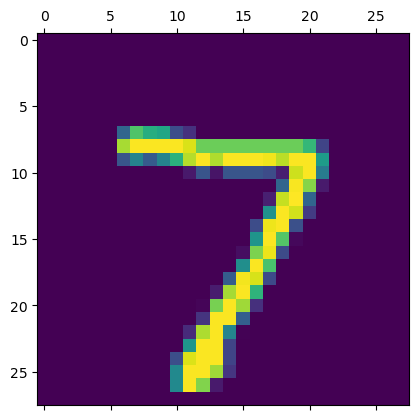

In [22]:
plt.matshow(X_test[0])
plt.show()

In [23]:
np.argmax(y_predicted[0])

7

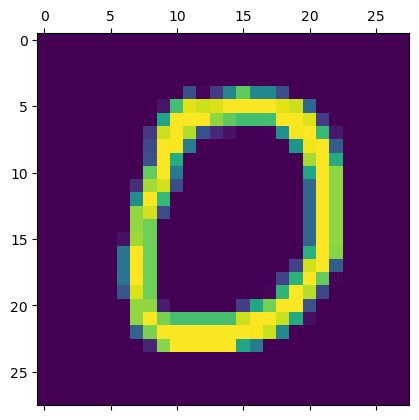

In [40]:
plt.matshow(X_test[10])
plt.show()

In [41]:
np.argmax(y_predicted[10])

0

In [28]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [29]:
print("Classification Report:\n", classification_report(y_test, y_predicted_labels))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.96      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [30]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    0,    0,    1,    2,    1,    3,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   1,    0, 1025,    0,    0,    0,    0,    5,    1,    0],
       [   0,    0,    1, 1006,    0,    2,    0,    0,    1,    0],
       [   0,    0,    0,    0,  945,    0,    2,    1,    5,   29],
       [   1,    0,    1,    7,    0,  882,    1,    0,    0,    0],
       [   2,    1,    0,    0,    1,    4,  947,    0,    3,    0],
       [   0,    2,    8,    1,    0,    0,    0, 1016,    0,    1],
       [   1,    0,    1,    3,    0,    1,    0,    1,  965,    2],
       [   0,    0,    0,    2,    1,    3,    0,    1,    2, 1000]])>

CNN working well on this data